In [51]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg  
import matplotlib.colors as clr
import numpy as np 
import cv2 as cv

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

imge = cv.imread("../test_data/screws_006.png")
imge = cv.cvtColor(imge, cv.COLOR_BGR2RGB)
imge = cv.resize(imge, (480, 360))

Text(0.5, 1.0, 'Image after filtering w/ gaussian filter')

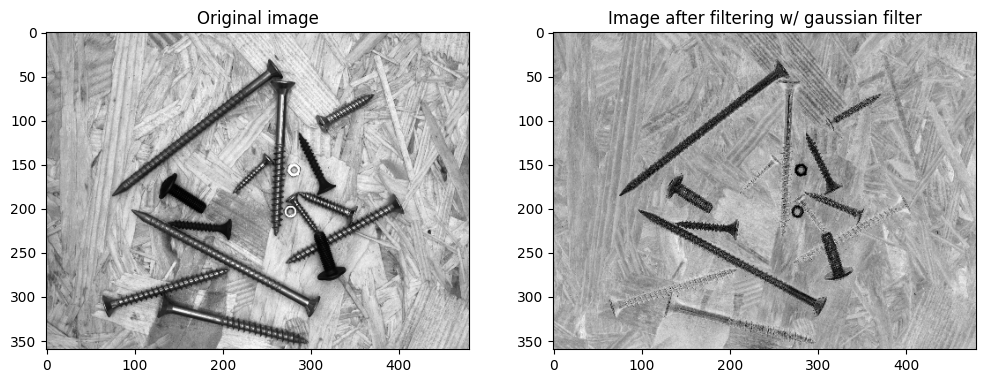

In [52]:
kernel = np.ones((3,3),np.uint8)
gray = cv.cvtColor(imge, cv.COLOR_RGB2GRAY)

hsv = cv.cvtColor(imge, cv.COLOR_RGB2HSV)
hsv = hsv[:,:,1]

fig, axs = plt.subplots(1,2)
axs[0].imshow(gray, cmap = 'gray')
axs[0].set_title('Original image')
axs[1].imshow(hsv, cmap = 'gray')
axs[1].set_title('Image after filtering w/ gaussian filter')

Text(0.5, 1.0, 'Dilated image')

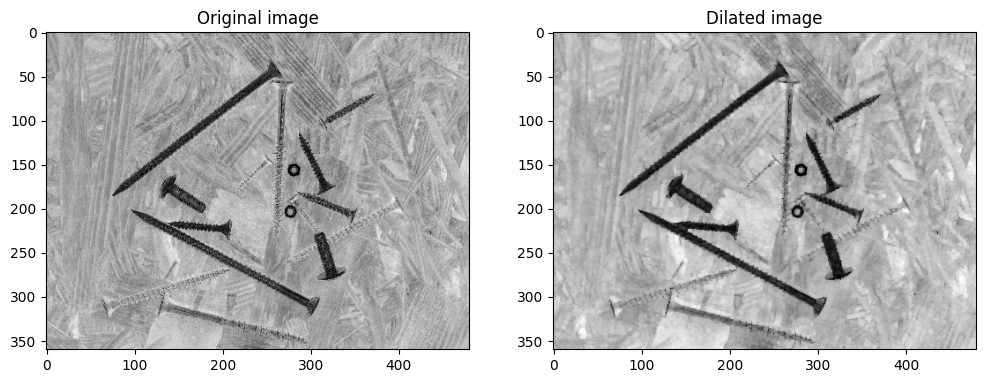

In [53]:
dilation = cv.morphologyEx(hsv, cv.MORPH_OPEN, kernel)
fig, axs = plt.subplots(1,2)
axs[0].imshow(hsv, cmap = 'gray')
axs[0].set_title('Original image')
axs[1].imshow(dilation, cmap = 'gray')
axs[1].set_title('Dilated image')

Text(0.5, 1.0, 'Image after filtering w/ gaussian filter')

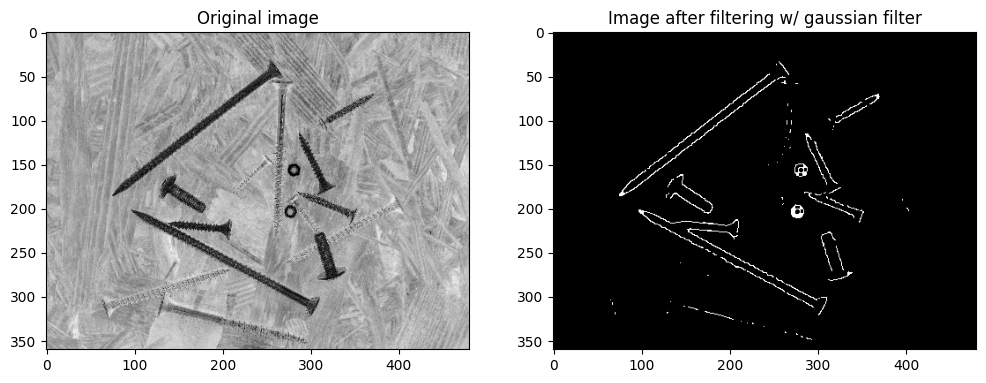

In [54]:
blur = cv.GaussianBlur(dilation, (3,3), 0)

gaus = cv.Canny(blur,250,255)
gaus = cv.dilate(gaus, kernel, iterations = 1)
gaus = cv.erode(gaus, kernel, iterations = 1)

fig, axs = plt.subplots(1,2)
axs[0].imshow(hsv, cmap = 'gray')
axs[0].set_title('Original image')
axs[1].imshow(gaus, cmap = 'gray')
axs[1].set_title('Image after filtering w/ gaussian filter')

Total number of objects:
2


Text(0.5, 1.0, 'Image w/ Detected Hough Circles')

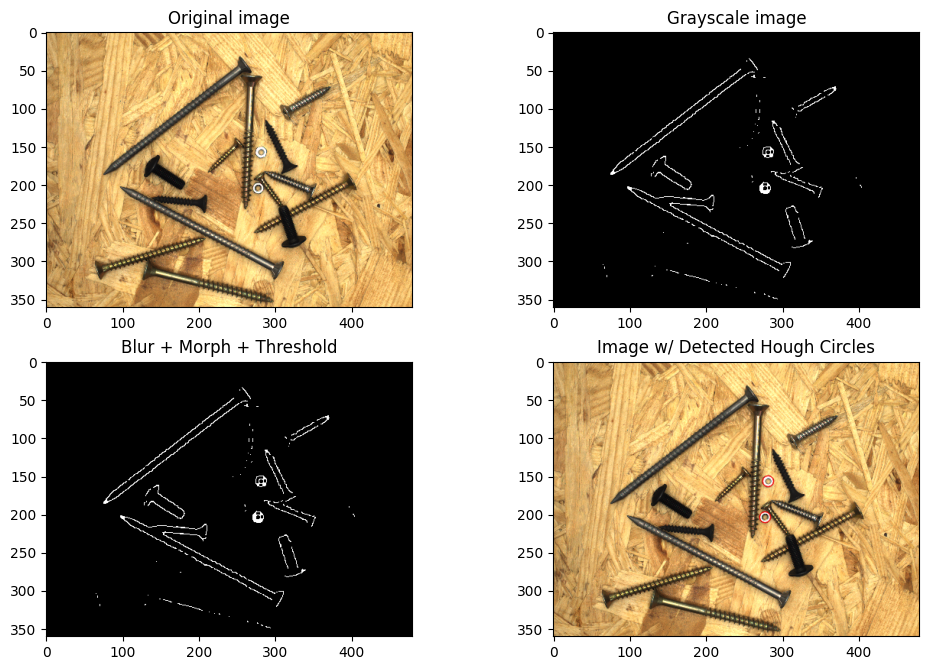

In [55]:
imcopy = imge.copy()

params = cv.SimpleBlobDetector_Params()

params.filterByColor = True
params.blobColor = 0

params.filterByArea = True
params.minArea = 50

params.filterByCircularity = True
params.minCircularity = 0.785
params.maxCircularity = 1.0

params.filterByConvexity = True
params.minConvexity = 0.4
params.maxConvexity = 1.0

params.filterByInertia = True
params.minInertiaRatio = 0.1

detector = cv.SimpleBlobDetector_create(params)

keypoints = detector.detect(gaus)

im_with_keypoints = cv.drawKeypoints (imcopy, keypoints, np.array([]), (255,0,0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print("Total number of objects:")
print(len(keypoints))

fig, axs = plt.subplots(2,2)
axs[0,0].imshow(imge)
axs[0,0].set_title('Original image')
axs[0,1].imshow(gaus, cmap = 'gray')
axs[0,1].set_title('Grayscale image')
axs[1,0].imshow(gaus, cmap = 'gray')
axs[1,0].set_title('Blur + Morph + Threshold')
axs[1,1].imshow(im_with_keypoints)
axs[1,1].set_title('Image w/ Detected Hough Circles')